In [31]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection  import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
airport = pd.read_csv("airport_data.csv", sep=',', header=0)
airport.head()

,ID,Airport,Airline,Age,Gender,Nationality,TripPurpose,TripDuration,FlyingCompanion,ProvinceResidence,...,SeatClass,Airfare,NoTransport,ModeTransport,AccessCost,AccessTime,Occupation,Income,MileageAirline,Mileage
0,1,1,1.0,49.0,1.0,1,2,7,0,3,...,1.0,80.0,1,6,8000.0,40.0,1,5.0,1,150000.0
1,2,1,1.0,49.0,2.0,1,1,4,4,3,...,1.0,41.0,1,6,8000.0,50.0,9,3.0,NaN,NaN
2,3,1,1.0,25.0,1.0,1,1,10,2,3,...,1.0,NaN,2,4,1000.0,20.0,12,NaN,NaN,NaN
3,4,1,1.0,29.0,1.0,1,2,7,2,3,...,1.0,40.0,1,1,NaN,NaN,8,7.0,2,100000.0
4,5,1,1.0,34.0,2.0,1,2,4,0,3,...,1.0,40.0,1,6,8000.0,50.0,1,3.0,NaN,NaN


In [33]:
# Count missing values in each column
missing_values = airport.isnull().sum()

# Display the result
print("Count of missing values in each column:")
print(missing_values)

Count of missing values in each column:
ID                             0
Airport                        0
Airline                       10
Age                            1
Gender                         3
Nationality                    0
TripPurpose                    0
TripDuration                   0
FlyingCompanion                0
ProvinceResidence              0
GroupTravel                    0
NoTripsLastYear                0
FrequentFlightDestination      0
Destination                    5
FlightNo                     142
DepartureHr                   33
DepartureMn                  120
DepartureTime                  0
SeatClass                      4
Airfare                      155
NoTransport                    0
ModeTransport                  0
AccessCost                   197
AccessTime                    97
Occupation                     0
Income                       132
MileageAirline               237
Mileage                      398
dtype: int64


In [34]:
''' Seven columns to consider
Count of missing values in each column:
Airport                        0
Nationality                    0
FlyingCompanion                0
Destination                    5
DepartureTime                  0
AccessCost                   197
Occupation                     0

Imputing using mean the missing values for Destination and Access cost as rest all dont have any missing value'''

# Impute missing values with the mean of Destination
airport['Destination_n'] = airport['Destination'].fillna(airport['Destination'].mean())
airport['Destination_n'] = airport['Destination'].fillna(airport['Destination'].mean())

from sklearn.impute import KNNImputer
column_name = 'AccessCost'

# Selecting only 'AccessTime' and 'AccessCost' columns for imputation
imputation_data = airport[['AccessTime', column_name]]

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Impute missing values in the selected column
imputation_data_imputed = imputer.fit_transform(imputation_data)

# Update the original DataFrame with the imputed values
airport['AccessCost_n'] = imputation_data_imputed[:, 1]


In [35]:
### Testing the results of imputation on column Access cost
airport.loc[airport['AccessCost'].isna() & airport['AccessTime'].notna() ,['AccessCost_n','AccessCost','AccessTime']].sort_values(by='AccessTime', ascending=False)

,AccessCost_n,AccessCost,AccessTime
225,33950.0,NaN,390.0
453,33950.0,NaN,180.0
464,33950.0,NaN,180.0
349,33950.0,NaN,180.0
454,33950.0,NaN,180.0
...,...,...,...
80,1900.0,NaN,10.0
346,1900.0,NaN,10.0
456,1900.0,NaN,10.0
395,2700.0,NaN,5.0


In [36]:
### Creating descriptive summaries for variables 

airport.describe()

,ID,Airport,Airline,Age,Gender,Nationality,TripPurpose,TripDuration,FlyingCompanion,ProvinceResidence,...,Airfare,NoTransport,ModeTransport,AccessCost,AccessTime,Occupation,Income,Mileage,Destination_n,AccessCost_n
count,488.000000,488.000000,478.000000,487.000000,485.000000,488.000000,488.000000,488.000000,488.000000,488.000000,...,333.000000,488.000000,488.000000,291.000000,391.000000,488.000000,356.000000,90.000000,488.000000,488.000000
mean,244.500000,1.510246,2.422594,39.965092,1.527835,1.483607,1.518443,27.440574,2.819672,3.391393,...,50.456577,1.334016,3.801230,11220.079038,51.831202,6.768443,3.126404,56383.700000,2.175983,12114.132077
std,141.017729,0.500408,1.208492,13.672869,0.499740,1.013126,0.861966,74.988134,4.001573,2.599259,...,28.981217,0.552306,2.380499,24083.030747,43.486834,4.172077,1.573828,89411.837228,0.888024,21822.353817
min,1.000000,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,3.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,122.750000,1.000000,1.000000,29.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,...,35.000000,1.000000,2.000000,2000.000000,25.000000,2.000000,2.000000,8257.500000,1.000000,2150.000000
50%,244.500000,2.000000,2.000000,38.000000,2.000000,1.000000,1.000000,5.000000,2.000000,3.000000,...,45.000000,1.000000,3.000000,6000.000000,40.000000,8.000000,3.000000,27997.500000,2.000000,8000.000000
75%,366.250000,2.000000,4.000000,50.000000,2.000000,1.000000,2.000000,8.000000,3.000000,5.000000,...,60.000000,2.000000,6.000000,12000.000000,60.000000,12.000000,4.000000,61808.000000,3.000000,11220.079038
max,488.000000,2.000000,4.000000,80.000000,2.000000,5.000000,4.000000,730.000000,34.000000,8.000000,...,260.000000,4.000000,11.000000,350000.000000,390.000000,12.000000,7.000000,500000.000000,4.000000,350000.000000


In [37]:
airport.corr()

C:\Users\sharmaaditya\AppData\Local\Temp\ipykernel_28844\1451952760.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  airport.corr()


,ID,Airport,Airline,Age,Gender,Nationality,TripPurpose,TripDuration,FlyingCompanion,ProvinceResidence,...,Airfare,NoTransport,ModeTransport,AccessCost,AccessTime,Occupation,Income,Mileage,Destination_n,AccessCost_n
ID,1.000000,0.865845,0.100774,0.139303,0.091662,0.070684,0.094829,0.049766,0.058659,0.134783,...,-0.152984,-0.242486,-0.121258,-0.005408,-0.008857,-0.181801,-0.049608,-0.082911,-0.411646,-0.014821
Airport,0.865845,1.000000,0.099246,0.127423,0.025588,0.087413,0.147138,0.023273,0.038866,0.188722,...,-0.156892,-0.298449,-0.118089,0.002460,-0.028851,-0.217700,-0.073823,-0.029936,-0.458814,-0.024152
Airline,0.100774,0.099246,1.000000,-0.125544,0.026953,0.084319,-0.067500,-0.050080,-0.112970,0.116801,...,-0.170800,0.084954,-0.028243,-0.116214,-0.073816,-0.121851,-0.128253,-0.117580,0.079500,-0.061160
Age,0.139303,0.127423,-0.125544,1.000000,0.016012,-0.102524,-0.079066,-0.030070,0.239402,-0.010493,...,0.039995,-0.020267,-0.038722,0.046765,0.052432,0.115831,0.014190,0.189031,-0.105692,-0.013440
Gender,0.091662,0.025588,0.026953,0.016012,1.000000,-0.055241,-0.194077,-0.063381,0.120371,-0.003721,...,-0.078524,0.011150,0.009826,-0.038483,0.047021,0.206641,-0.138174,-0.184905,0.000359,-0.069254
Nationality,0.070684,0.087413,0.084319,-0.102524,-0.055241,1.000000,0.079117,0.027569,-0.097472,0.291341,...,-0.050269,-0.039735,0.055265,0.003892,0.043131,-0.152712,0.116032,0.036979,0.039594,0.004123
TripPurpose,0.094829,0.147138,-0.067500,-0.079066,-0.194077,0.079117,1.000000,0.258512,-0.190131,0.143869,...,0.045650,-0.049628,-0.054750,0.075719,-0.015510,-0.003663,0.054586,0.041034,-0.198029,0.097185
TripDuration,0.049766,0.023273,-0.050080,-0.030070,-0.063381,0.027569,0.258512,1.000000,-0.118358,0.071857,...,0.047013,-0.040299,0.063965,0.111994,-0.045946,0.005853,0.031346,-0.127279,-0.105637,0.116642
FlyingCompanion,0.058659,0.038866,-0.112970,0.239402,0.120371,-0.097472,-0.190131,-0.118358,1.000000,-0.072563,...,0.008776,0.026380,-0.111120,-0.055563,0.006968,0.066125,-0.062624,-0.093551,-0.066787,-0.084713
ProvinceResidence,0.134783,0.188722,0.116801,-0.010493,-0.003721,0.291341,0.143869,0.071857,-0.072563,1.000000,...,0.027546,0.023176,0.124104,0.205127,0.217785,-0.013022,0.006374,0.073830,-0.143508,0.142936


In [38]:
### Creating summary graphs for relevant variables 

airport_s = airport.loc[:,['Airport','Nationality','FlyingCompanion','Destination','DepartureTime','AccessCost','Occupation']]

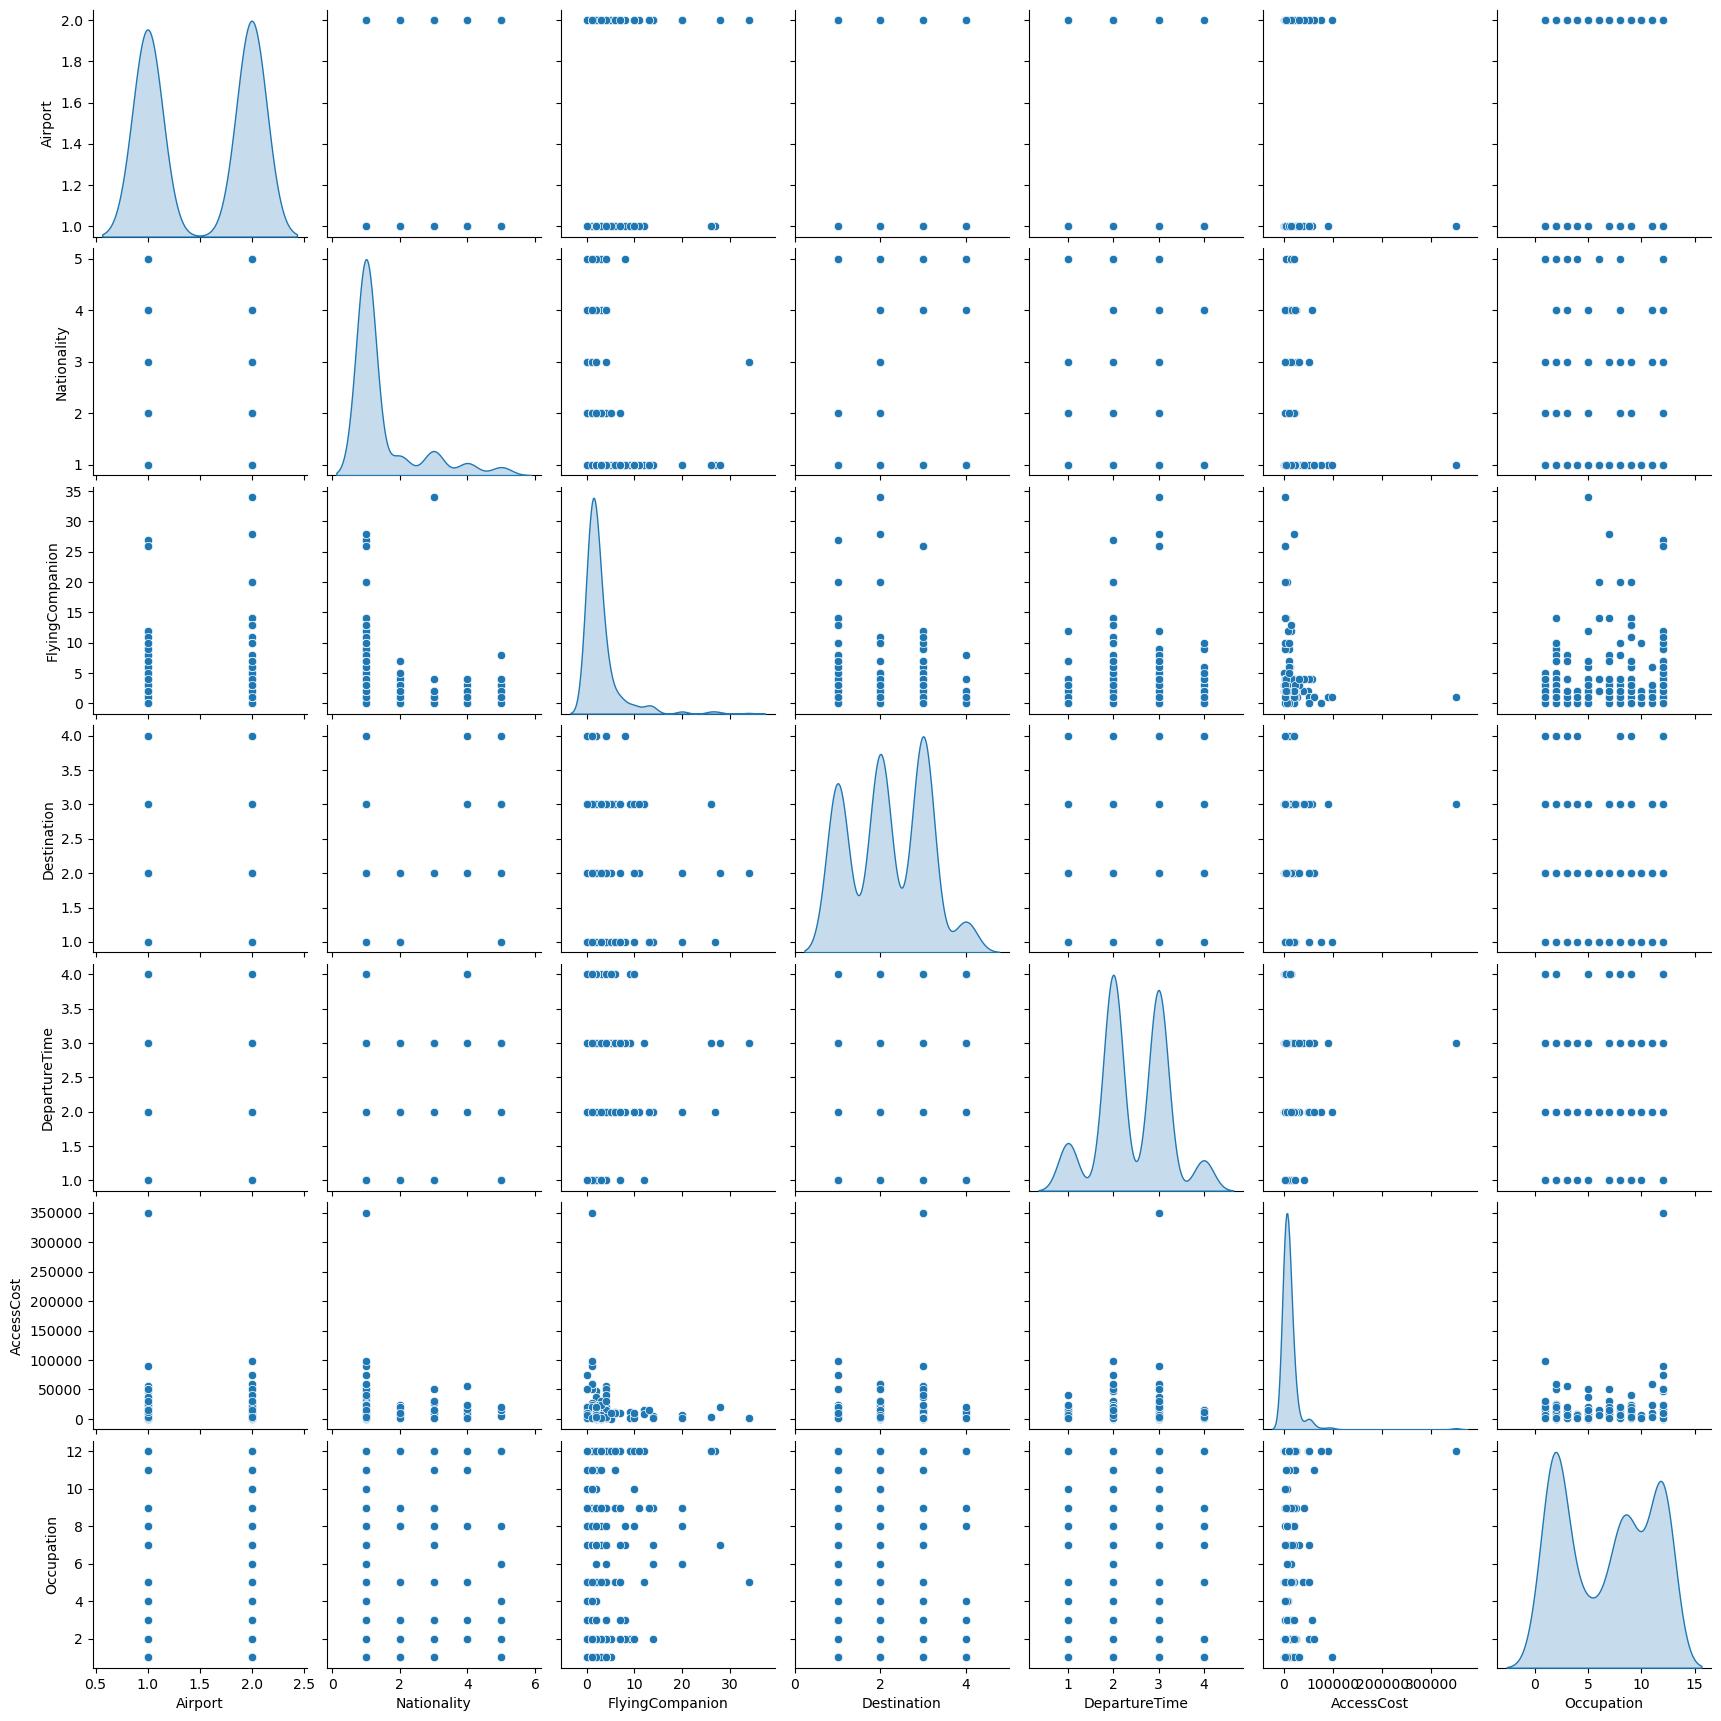

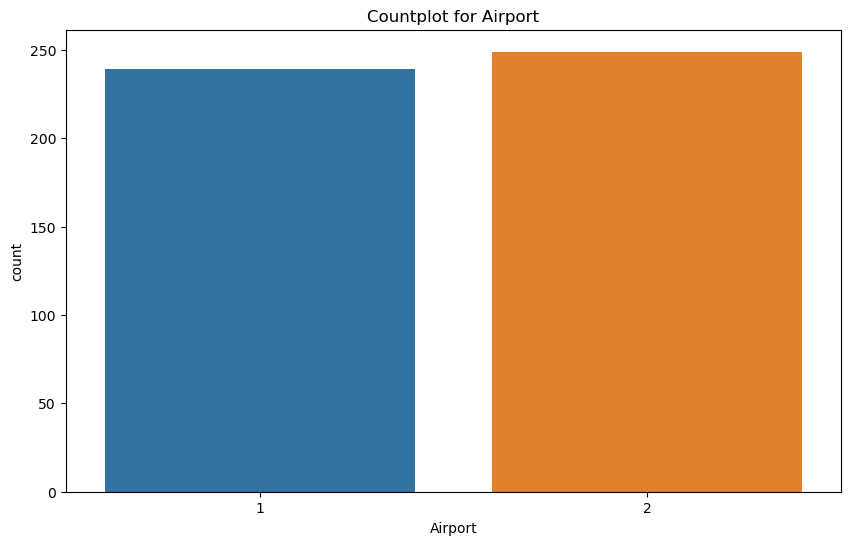

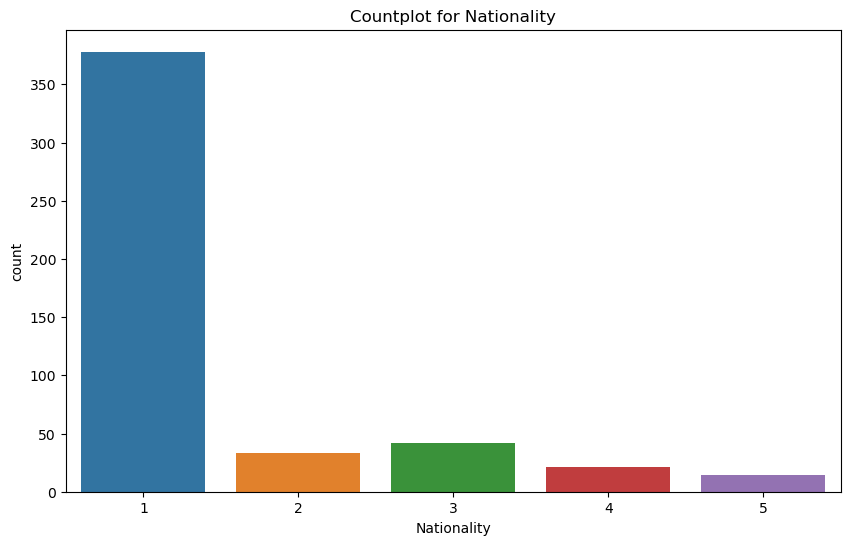

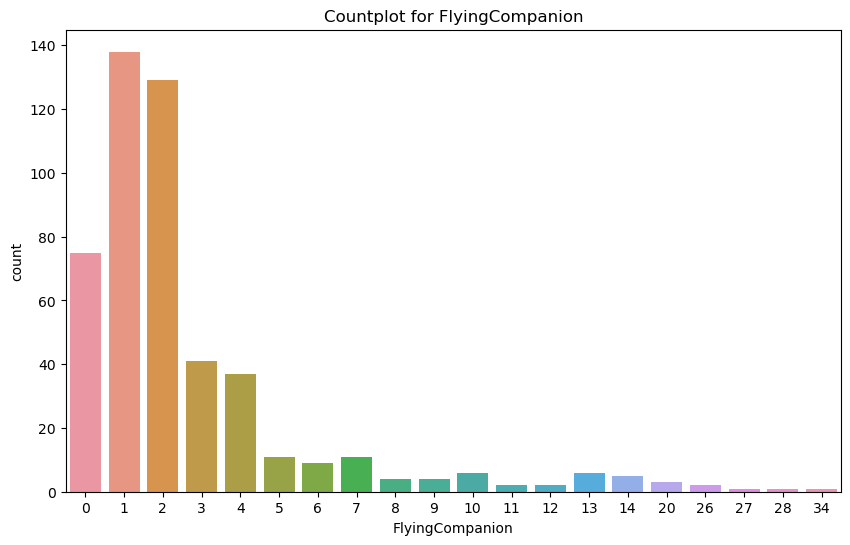

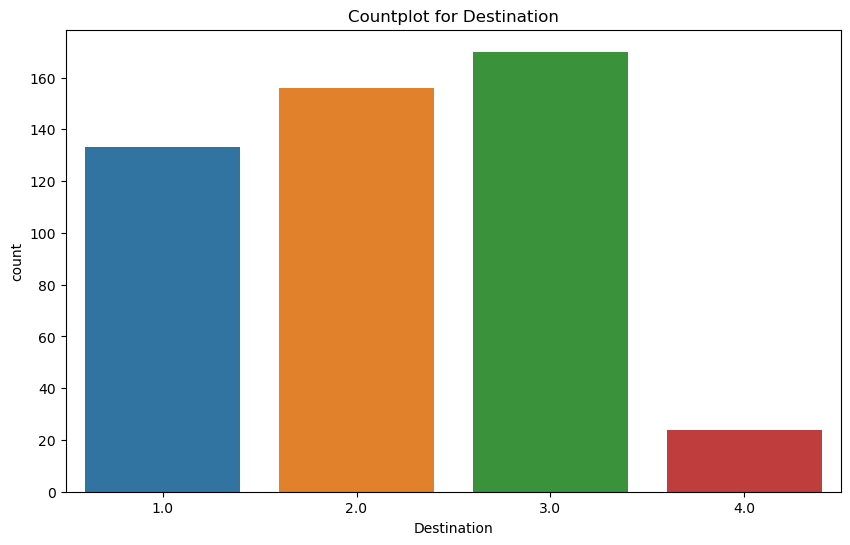

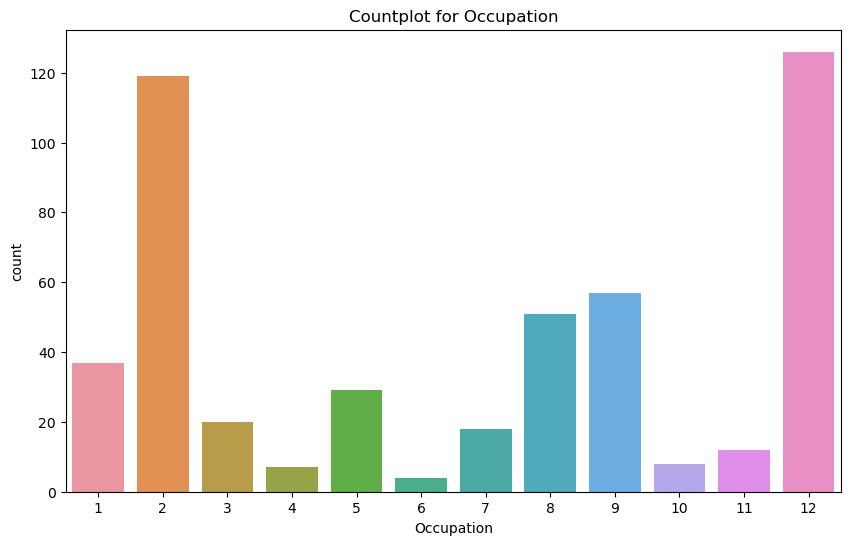

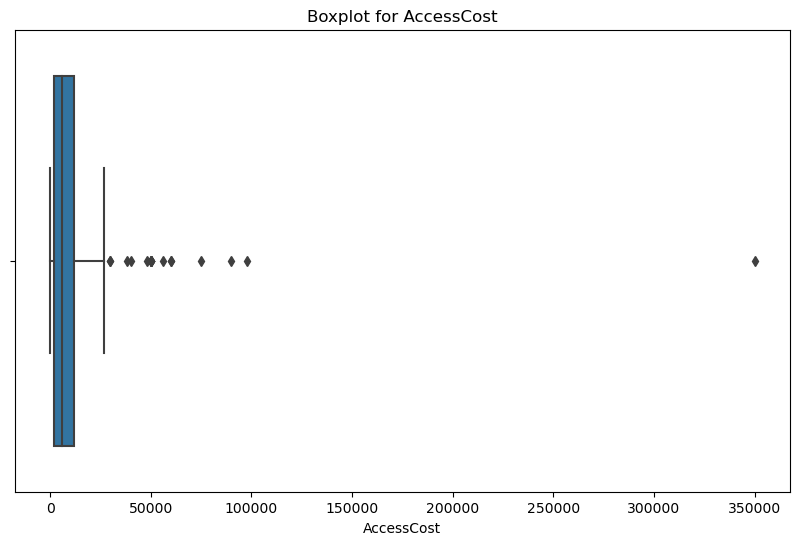

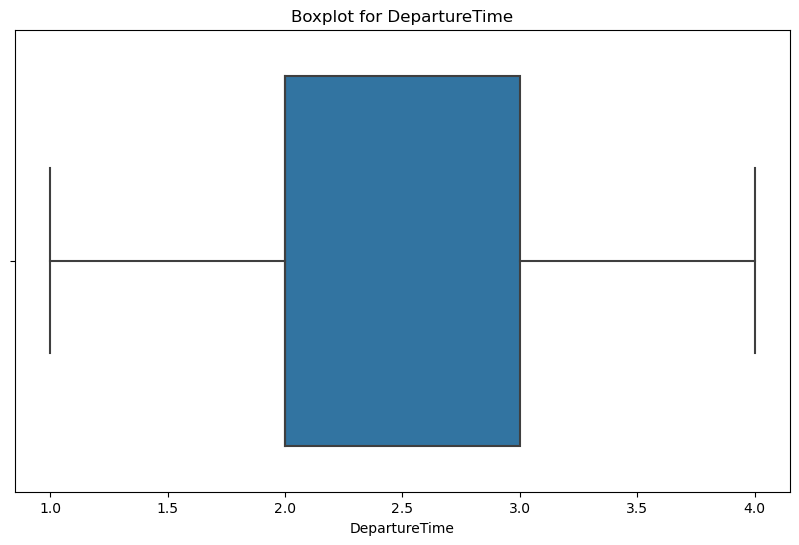

In [39]:
# Pairplot for numerical columns
sns.pairplot(airport_s, diag_kind='kde')
plt.show()

# Countplot for categorical columns
categorical_columns = ['Airport', 'Nationality', 'FlyingCompanion', 'Destination', 'Occupation']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=airport_s, x=column)
    plt.title(f'Countplot for {column}')
    plt.show()

# Boxplot for numerical columns
numerical_columns = ['AccessCost', 'DepartureTime']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=airport_s, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()